In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.target_names)
print(iris.feature_names)
print(iris.data.shape)
print(iris.target.shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from matplotlib.lines import Line2D

In [5]:
iris = datasets.load_iris()

In [6]:
model = svm.SVC()
model.fit(iris.data, iris.target)

SVC()

In [7]:
predict = model.predict(iris.data)
n_correct = sum(predict == iris.target)

In [8]:
cmap = np.array([(1, 0, 0), (0, 1, 0), (0, 0, 1)])
clabel = [Line2D([0], [0], marker = 'o', lw = 0, label = iris.target_names[i], color = cmap[i]) for i in range(len(cmap))]

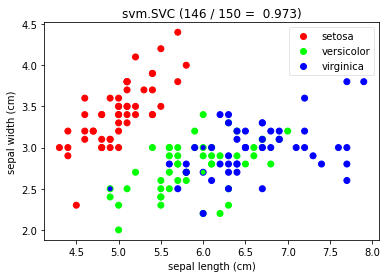

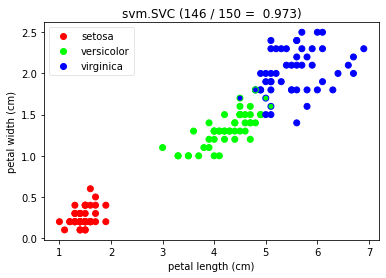

In [9]:
for x, y in [(0, 1), (2, 3)]:
    plt.title(f'svm.SVC ({n_correct} / {len(iris.data)} = {n_correct / len(iris.data) : .3f})')
    plt.scatter(iris.data[:, x], iris.data[:, y], c = cmap[iris.target], edgecolors = cmap[predict])
    plt.xlabel(iris.feature_names[x])
    plt.ylabel(iris.feature_names[y])
    plt.legend(handles = clabel, framealpha = 0.5)
    plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, tree, ensemble, metrics
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

In [11]:
iris = datasets.load_iris()
iris.data = iris.data[:, 0:2]
iris.feature_names = iris.feature_names[0:2]
iris.color = np.array([(1, 0, 0),
                      (0, 1, 0),
                      (0, 1, 1)])

In [12]:
model = tree.DecisionTreeClassifier(max_depth = 2)
model.fit(iris.data, iris.target)

DecisionTreeClassifier(max_depth=2)

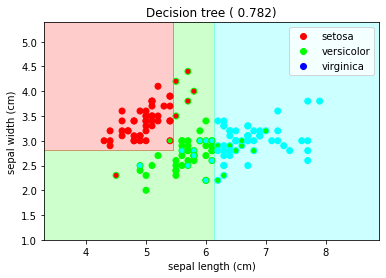

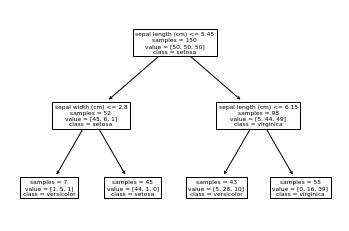

In [13]:
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xy = np.vstack((xx.flatten(), yy.flatten())).T
zz = model.predict(xy)

plt.contourf(xx, yy, zz.reshape(xx.shape), cmap = ListedColormap(iris.color), alpha = 0.2)
predict = model.predict(iris.data)

accuracy = metrics.balanced_accuracy_score(predict, iris.target)
clabel = [Line2D([0], [0], marker = 'o', lw = 0, label = iris.target_names[i], color = cmap[i]) for i in range(len(cmap))]
plt.title(f'Decision tree ({accuracy : .3f})')
plt.scatter(iris.data[:, 0], iris.data[:, 1], color = iris.color[iris.target], edgecolors = iris.color[predict])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(handles = clabel)
plt.show()

tree.plot_tree(model, feature_names = iris.feature_names, class_names = iris.target_names, impurity = False)
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, naive_bayes, metrics
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal

In [15]:
iris = datasets.load_iris()
iris.data = iris.data[:, 0:2]
iris.feature_names = iris.feature_names[0:2]
iris.color = np.array([(1, 0, 0),
                       (0, 1, 0),
                        (0, 0, 1)])

In [16]:
model = naive_bayes.GaussianNB()
model.fit(iris.data, iris.target)

GaussianNB()

In [17]:
for c in range(len(model.classes_)):
    data = iris.data[iris.target == c,:]
    print(f'## Class {c}')
    print(' * Trained prior = ' + np.array2string(model.class_prior_[c], precision=3))
    print(' * Manual prior = ' + '{:.3f}'.format(len(data) / len(iris.data)))
    print(' * Trained mean = ' + np.array2string(model.theta_[c], precision=3))
    print(' * Manual mean = ' + np.array2string(np.mean(data, axis=0), precision=3))
    print(' * Trained Sigma = ' + np.array2string(model.sigma_[c], precision=3))
    print(' * Manual Sigma = ' + np.array2string(np.var(data, axis=0), precision=3))

## Class 0
 * Trained prior = 0.333
 * Manual prior = 0.333
 * Trained mean = [5.006 3.428]
 * Manual mean = [5.006 3.428]
 * Trained Sigma = [0.122 0.141]
 * Manual Sigma = [0.122 0.141]
## Class 1
 * Trained prior = 0.333
 * Manual prior = 0.333
 * Trained mean = [5.936 2.77 ]
 * Manual mean = [5.936 2.77 ]
 * Trained Sigma = [0.261 0.097]
 * Manual Sigma = [0.261 0.097]
## Class 2
 * Trained prior = 0.333
 * Manual prior = 0.333
 * Trained mean = [6.588 2.974]
 * Manual mean = [6.588 2.974]
 * Trained Sigma = [0.396 0.102]
 * Manual Sigma = [0.396 0.102]


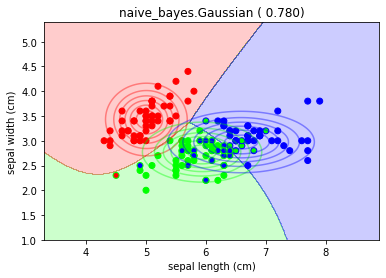

In [18]:
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xy = np.vstack((xx.flatten(), yy.flatten())).T
zz = model.predict(xy)
plt.contourf(xx, yy, zz.reshape(xx.shape), cmap = ListedColormap(iris.color), alpha = 0.2)

for c in range(len(model.classes_)):
    likelihood = multivariate_normal(model.theta_[c], np.diag(model.sigma_[c]))
    zz = model.class_prior_[c] * likelihood.pdf(xy)
    plt.contour(xx, yy, zz.reshape(xx.shape), cmap = ListedColormap(iris.color[c]), alpha = 0.4)

predict = model.predict(iris.data)
accuracy = metrics.balanced_accuracy_score(iris.target, predict)

plt.title(f'naive_bayes.Gaussian ({accuracy : .3f})')
plt.scatter(iris.data[:, 0], iris.data[:, 1], color = iris.color[iris.target], edgecolors = iris.color[predict])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from matplotlib.colors import ListedColormap

In [20]:
iris = datasets.load_iris()
iris.data = iris.data[:, 0:2]
iris.feature_namse = iris.feature_names[0:2]
iris.color = np.array([(1, 0, 0),
                      (0, 1, 0),
                      (0, 0, 1)])

In [22]:
model = cluster.KMeans(n_clusters = 3)
model.fit(iris.data)

KMeans(n_clusters=3)

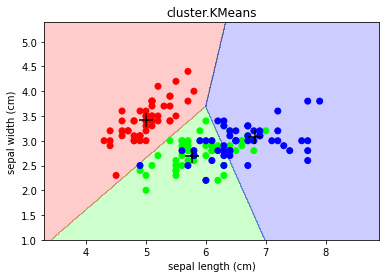

In [29]:
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xy = np.vstack((xx.flatten(), yy.flatten())).T
zz = model.predict(xy)
plt.contourf(xx, yy, zz.reshape(xx.shape), cmap = ListedColormap(iris.color), alpha = 0.2)

plt.title(f'cluster.KMeans')
plt.scatter(iris.data[:, 0], iris.data[:, 1], color = iris.color[iris.target])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

for c in range(model.n_clusters):
    plt.scatter(*model.cluster_centers_[c], marker = '+', s = 200, color = 'k')

plt.show()